In [2]:
import pandas as pd

In [3]:
def get_gross_margin(revenue: pd.Series, cost_of_goods_sold: pd.Series) -> pd.Series:
    """
    Calculate the gross margin, a profitability ratio that measures the percentage of
    revenue that exceeds the cost of goods sold.

    Args:
        revenue (float or pd.Series): Total revenue of the company.
        cost_of_goods_sold (float or pd.Series): Total cost of goods sold of the company.

    Returns:
        float | pd.Series: The gross margin percentage value.
    """
    return (revenue - cost_of_goods_sold) / revenue

In [4]:
def plot_gross_margin(gross_margin: pd.Series) -> pd.Series:
    """
    Plot the gross margin, a profitability ratio that measures the percentage of
    revenue that exceeds the cost of goods sold.

    Args:
        gross_margin (pd.Series): Gross Margin of the company.

    Returns:
        A plot of the gross margin.
    """
    gross_margin.plot(
        kind="bar",
        title="Gross Margin",
        ylabel="Gross Margin (%)",
        xlabel="Date",
        color="green"
    )

In [5]:
def calculate_growth(
    dataset: pd.Series | pd.DataFrame,
    lag: int | list[int] = 1,
    rounding: int | None = 4,
    axis: str = "columns",
) -> pd.Series | pd.DataFrame:
    """
    Calculates growth for a given dataset. Defaults to a lag of 1 (i.e. 1 year or 1 quarter).

    Args:
        dataset (pd.Series | pd.DataFrame): the dataset to calculate the growth values for.
        lag (int | str): the lag to use for the calculation. Defaults to 1.
        rounding (int | None): the number of decimals to round the results to. Defaults to 4.
        axis (str): the axis to use for the calculation. Defaults to "columns".

    Returns:
        pd.Series | pd.DataFrame: _description_
    """
    return dataset.pct_change(periods=lag, axis=axis).round(rounding)

In [6]:
def obtain_gross_margin(
    rounding: int | None = 4,
    growth: bool = False,
    lag: int | list[int] = 1,
    plot: bool = False,
    axis: str = "rows",
) -> pd.DataFrame:
    """
    Calculate the gross margin, a profitability ratio that measures the percentage of
    revenue that exceeds the cost of goods sold.

    The gross margin ratio is calculated by subtracting the cost of goods sold (COGS) from
    the total revenue and then dividing the result by the total revenue. It represents the
    portion of revenue that contributes to covering other expenses and generating profit.

    The formula is as follows:

        Gross Margin Ratio = (Revenue - Cost of Goods Sold) / Revenue

    Args:
        rounding (int, optional): The number of decimals to round the results to. Defaults to 4.
        growth (bool, optional): Whether to calculate the growth of the ratios. Defaults to False.
        lag (int | str, optional): The lag to use for the growth calculation. Defaults to 1.
        plot (bool, optional): Whether to plot the results. Defaults to False.
        axis (str, optional): The axis to use for the growth calculation. Defaults to "rows".

    Returns:
        pd.DataFrame | pd.Series: Gross margin ratio values.
    """
    gross_margin = get_gross_margin(
            income_statement.loc["Revenue"],
            income_statement.loc["Cost of Goods Sold"],
        )

    if growth:
        gross_margin_growth = calculate_growth(
            gross_margin, lag=lag, rounding=rounding, axis=axis
        )

        if plot:
            plot_gross_margin(gross_margin_growth)

        return gross_margin_growth
    
    if plot:
        plot_gross_margin(gross_margin)

    return gross_margin.round(rounding)

In [7]:
income_statement = pd.DataFrame(
    index=["Revenue", "Cost of Goods Sold"],
    columns=["2016", "2017", "2018", "2019", "2020"],
    data=[[100, 110, 120, 130, 80], [50, 60, 70, 80, 40]])

2016    0.5000
2017    0.4545
2018    0.4167
2019    0.3846
2020    0.5000
dtype: float64

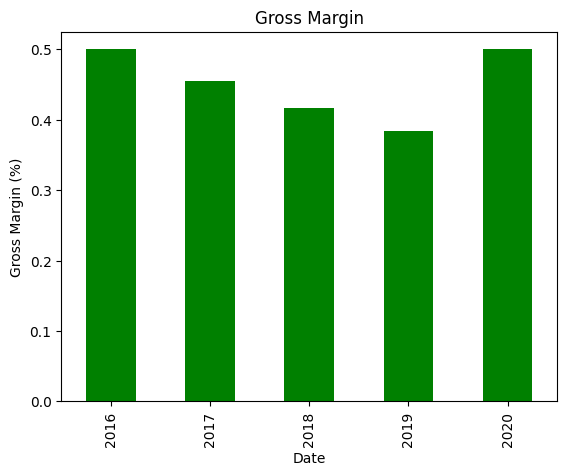

In [12]:
obtain_gross_margin(plot=True)